In [1]:
import os
os.chdir('../')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
import scanpy as sc
import torch
import scarches as sca
from scarches.dataset.trvae.data_handling import remove_sparsity
import matplotlib.pyplot as plt
import numpy as np
import gdown
import anndata as ad
import pandas as pd

import milopy

 captum (see https://github.com/pytorch/captum).
INFO:lightning_fabric.utilities.seed:Global seed set to 0
/home/alextopalova/miniconda3/envs/archmap/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from uncert_metric import *

In [4]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 3))
torch.set_printoptions(precision=3, sci_mode=False, edgeitems=7)

# Pancreas normal

In [5]:
condition_key = 'study'
cell_type_key = 'cell_type'
source_adata = sc.read("source/source__pancreas.h5ad")
target_adata = sc.read("target/target__pancreas.h5ad")
surgery_path = "surgery_model/surgery_model_pancreas"

In [6]:
model = sca.models.TRVAE.load(surgery_path, source_adata)

AnnData object with n_obs × n_vars = 10294 × 1000
    obs: 'batch', 'study', 'cell_type', 'size_factors'

INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 1000 128 5
	Hidden Layer 1 in/out: 128 128
	Mean/Var Layer in/out: 128 10
Decoder Architecture:
	First Layer in, out and cond:  10 128 5
	Hidden Layer 1 in/out: 128 128
	Output Layer in/out:  128 1000 



In [7]:
source_adata

AnnData object with n_obs × n_vars = 10294 × 1000
    obs: 'batch', 'study', 'cell_type', 'size_factors'

In [8]:
source_adata.obs["ref_or_query"] = "ref"
target_adata.obs["ref_or_query"] = "query"

In [9]:
combined_emb = ad.concat([source_adata, target_adata])

In [10]:
adata_all_latent = sc.AnnData(model.get_latent(combined_emb.X, combined_emb.obs[condition_key]))
adata_all_latent.obs['cell_type'] = combined_emb.obs[cell_type_key].tolist()
adata_all_latent.obs['batch'] = combined_emb.obs[condition_key].tolist()

In [11]:
uncertainties = integration_uncertain(
    adata_latent = adata_all_latent,
    batch_key = "batch"
)

In [12]:
uncertainties

,batch,uncertainty
0,Pancreas CelSeq,0.432623
1,Pancreas CelSeq2,0.469310
2,Pancreas Fluidigm C1,0.547337
3,Pancreas SS2,0.535464
4,Pancreas inDrop,0.731403


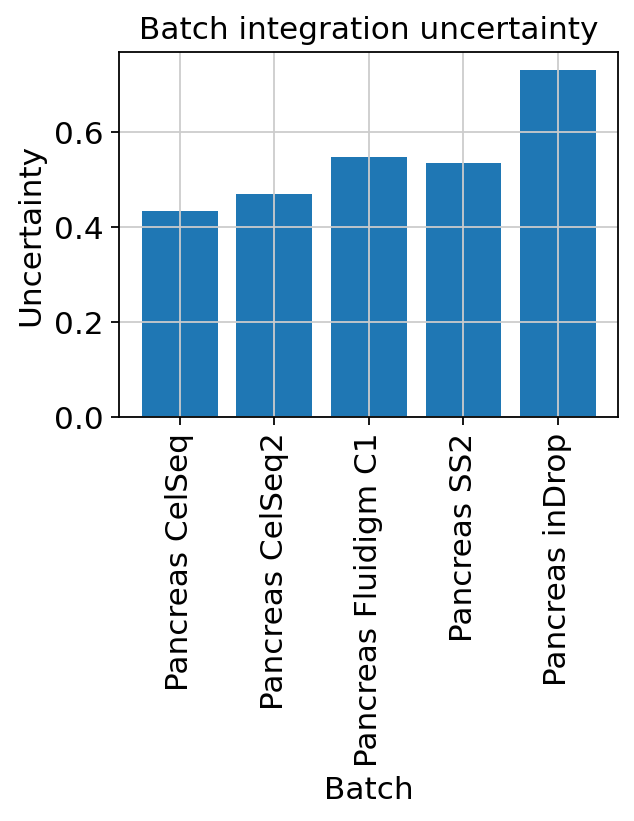

In [13]:
integration_uncert_diagram(uncertainties, "batch")

# Pancreas no alpha cells in reference

In [14]:
condition_key = 'study'
cell_type_key = 'cell_type'
source_adata = sc.read("source/source__pancreas_no_alpha.h5ad")
target_adata = sc.read("target/target__pancreas_no_alpha.h5ad")
surgery_path = "surgery_model/surgery_model_pancreas_no_alpha"

In [15]:
model = sca.models.TRVAE.load(surgery_path, source_adata)

AnnData object with n_obs × n_vars = 7584 × 1000
    obs: 'batch', 'study', 'cell_type', 'size_factors'

INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 1000 128 5
	Hidden Layer 1 in/out: 128 128
	Mean/Var Layer in/out: 128 10
Decoder Architecture:
	First Layer in, out and cond:  10 128 5
	Hidden Layer 1 in/out: 128 128
	Output Layer in/out:  128 1000 



In [16]:
combined_emb = ad.concat([source_adata, target_adata])

In [17]:
adata_all_latent = sc.AnnData(model.get_latent(combined_emb.X, combined_emb.obs[condition_key]))
adata_all_latent.obs['cell_type'] = combined_emb.obs[cell_type_key].tolist()
adata_all_latent.obs['batch'] = combined_emb.obs[condition_key].tolist()

In [18]:
uncertainties = integration_uncertain(
    adata_latent = adata_all_latent,
    batch_key = "batch"
)

In [19]:
uncertainties

,batch,uncertainty
0,Pancreas CelSeq,0.441650
1,Pancreas CelSeq2,0.516713
2,Pancreas Fluidigm C1,0.507102
3,Pancreas SS2,0.572792
4,Pancreas inDrop,0.704851


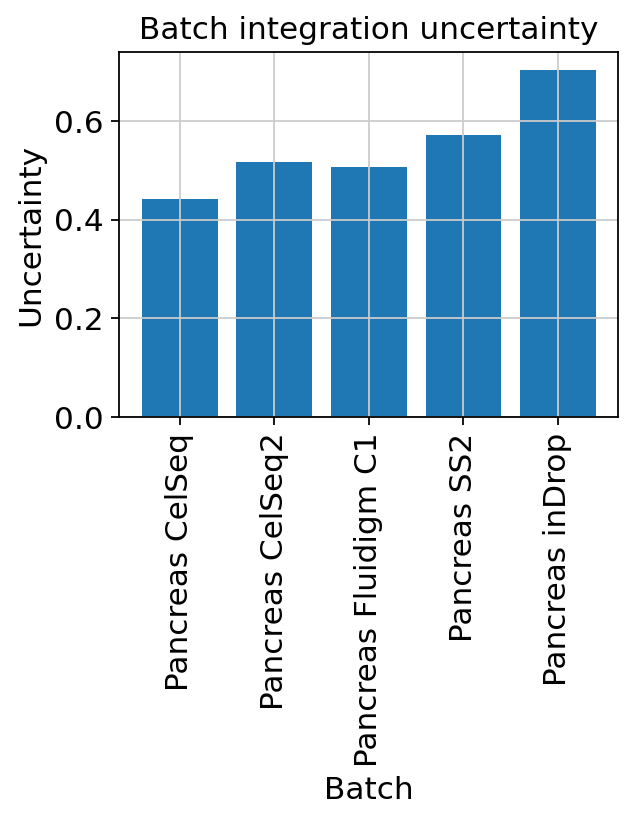

In [20]:
integration_uncert_diagram(uncertainties, "batch")

# PBMC normal

In [21]:
condition_key = 'batch' 
cell_type_key = 'final_annotation'
source_adata = sc.read("source/source__pbmc.h5ad")
target_adata = sc.read("target/target__pbmc.h5ad")
surgery_path = "surgery_model/surgery_model_pbmc"

In [22]:
model = sca.models.TRVAE.load(surgery_path, source_adata)

AnnData object with n_obs × n_vars = 29195 × 12303
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue'
    layers: 'counts'

INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 12303 128 10
	Hidden Layer 1 in/out: 128 128
	Mean/Var Layer in/out: 128 10
Decoder Architecture:
	First Layer in, out and cond:  10 128 10
	Hidden Layer 1 in/out: 128 128
	Output Layer in/out:  128 12303 



In [23]:
combined_emb = ad.concat([source_adata, target_adata])

In [24]:
adata_all_latent = sc.AnnData(model.get_latent(combined_emb.X, combined_emb.obs[condition_key]))
adata_all_latent.obs['cell_type'] = combined_emb.obs[cell_type_key].tolist()
adata_all_latent.obs['batch'] = combined_emb.obs[condition_key].tolist()

In [25]:
uncertainties = integration_uncertain(
    adata_latent = adata_all_latent,
    batch_key = "batch"
)

In [26]:
uncertainties

,batch,uncertainty
0,10X,0.507625
1,Freytag,0.368994
2,Oetjen_A,0.425745
3,Oetjen_P,0.566131
4,Oetjen_U,0.397591
5,Sun_sample1_CS,0.323841
6,Sun_sample2_KC,0.373243
7,Sun_sample3_TB,0.340446
8,Sun_sample4_TC,0.350094
9,Villani,0.426731


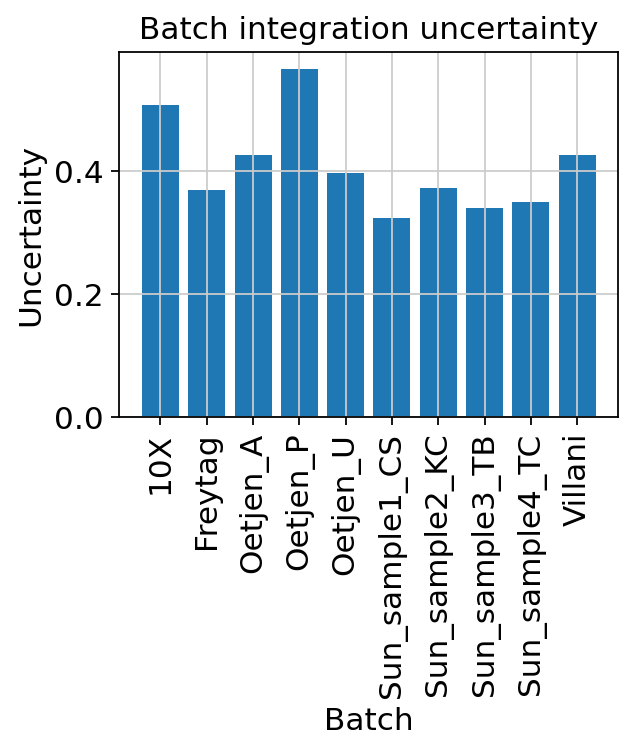

In [27]:
integration_uncert_diagram(uncertainties, "batch")

# PBMC 10X and Villani

In [28]:
condition_key = 'batch' 
cell_type_key = 'final_annotation'
source_adata = sc.read("source/source__pbmc_10x_villani.h5ad")
target_adata = sc.read("target/target__pbmc_10x_villani.h5ad")
surgery_path = "surgery_model/surgery_model_pbmc_10x_villani"

In [29]:
model = sca.models.TRVAE.load(surgery_path, source_adata)

AnnData object with n_obs × n_vars = 21757 × 12303
    obs: 'batch', 'chemistry', 'data_type', 'dpt_pseudotime', 'final_annotation', 'mt_frac', 'n_counts', 'n_genes', 'sample_ID', 'size_factors', 'species', 'study', 'tissue'
    layers: 'counts'

INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 12303 128 10
	Hidden Layer 1 in/out: 128 128
	Mean/Var Layer in/out: 128 10
Decoder Architecture:
	First Layer in, out and cond:  10 128 10
	Hidden Layer 1 in/out: 128 128
	Output Layer in/out:  128 12303 



In [30]:
combined_emb = ad.concat([source_adata, target_adata])

: 

: 

In [ ]:
combined_emb.obs.batch.unique()

In [ ]:
adata_all_latent = sc.AnnData(model.get_latent(combined_emb.X, combined_emb.obs[condition_key]))
adata_all_latent.obs['cell_type'] = combined_emb.obs[cell_type_key].tolist()
adata_all_latent.obs['batch'] = combined_emb.obs[condition_key].tolist()

In [ ]:
uncertainties = integration_uncertain(
    adata_latent = adata_all_latent,
    batch_key = "batch"
)

In [ ]:
uncertainties

In [ ]:
integration_uncert_diagram(uncertainties, "batch")